# Hyperspectral Imagery - Land Cover Classification using Deep Learning:

Hyperspectral Imaging is an important technique in remote sensing, which collects the electromagnetic spectrum ranging from the visible to the near-infrared wavelength. Hyperspectral imaging sensors often provide hundreds of narrow spectral bands from the same area on the surface of the earth. In hyperspectral images (HSI), each pixel can be regarded as a high-dimensional vector whose entries correspond to the spectral reflectance in a specific wavelength.

With the advantage of distinguishing subtle spectral differences, HSIs have been widely applied in diverse areas such as Crop Analysis, Geological Mapping, Mineral Exploration, Defence Research, Urban Investigation, Military Surveillance, Flood Tracking, etc. The data is publicly available on Group De Inteligencia Computacional (GIC).



__Refer:__

http://www.ehu.eus/ccwintco/index.php/Hyperspectral_Remote_Sensing_Scenes

https://aviris.jpl.nasa.gov/

https://www.indexdatabase.de/db/s-single.php?id=28

In [ ]:
!pip install earthpy

In [1]:
import matplotlib.pyplot as plt
import os

import numpy as np
import earthpy.plot as ep
import seaborn as sns
import earthpy.spatial as es

import plotly.graph_objects as go
import plotly.express as px

from scipy.io import loadmat

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Data Description - Indian Pines:

This scene was gathered by [AVIRIS sensor](https://aviris.jpl.nasa.gov/) over the Indian Pines test site in North-western Indiana and consists of $145 \times 145$ pixels and 224 spectral reflectance bands in the wavelength range $0.4 - 2.5 \times 10^{-6}$ meters.

This scene is a subset of a larger one. The Indian Pines scene contains two-thirds agriculture, and one-third forest or other natural perennial vegetation. There are two major dual lane highways, a rail line, as well as some low density housing, other built structures, and smaller roads. Since the scene is taken in June some of the crops present, corn, soybeans, are in early stages of growth with less than 5% coverage.

__The ground truth available is designated into sixteen classes and is not all mutually exclusive__. This dataset has _16 classes_.
__The spectral samples of the image containing no information is defined as Zero (0) and have to be discarded before the analysis.__

The number of bands have been reduced to 200 by removing bands covering the region of water absorption: [104-108], [150-163] and 220. Indian Pines data are available through Pursue's univeristy MultiSpec site.


[Data source](http://www.ehu.eus/ccwintco/index.php/Hyperspectral_Remote_Sensing_Scenes)

In [ ]:
os.getcwd()

'/home/arjun/Documents/Satellite_Image_Analysis-Python'

In [4]:
# Read Data-
# Usually, this type of data is in the form of '.mat' files. We need to read the data and convert it into a pandas data frame for further processing.
data = loadmat('Indian_pines.mat')['indian_pines']

In [ ]:
# type(data), data.keys()

In [5]:
ground_truth = loadmat('Indian_pines_gt.mat')['indian_pines_gt']

In [ ]:
# type(ground_truth), ground_truth.keys()
# (dict, dict_keys(['__header__', '__version__', '__globals__', 'indian_pines_gt']))

In [6]:
data.shape, ground_truth.shape

((145, 145, 220), (145, 145))

In [7]:
# Convert data as pd DataFrame from 3-D to 2-D
data_df = pd.DataFrame(data.reshape(data.shape[0] * data.shape[1], -1))

In [8]:
data_df.columns = [f'band{i}' for i in range(1, data_df.shape[-1] + 1)]

In [9]:
data_df['class'] = ground_truth.ravel()

In [10]:
data_df.shape

(21025, 221)

In [11]:
data_df.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band212,band213,band214,band215,band216,band217,band218,band219,band220,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1090,1112,1090,1062,1069,1057,1020,1020,1005,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1104,1117,1091,1079,1085,1064,1029,1020,1000,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1114,1114,1100,1065,1092,1061,1030,1016,1009,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1108,1109,1109,1071,1088,1060,1030,1006,1005,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1107,1112,1094,1072,1087,1052,1034,1019,1019,3


### Visualize Spectral Bands:
Randomly plot 10 out of 224 spectral bands of the _Indian Pines_ test site in North-western Indiana.

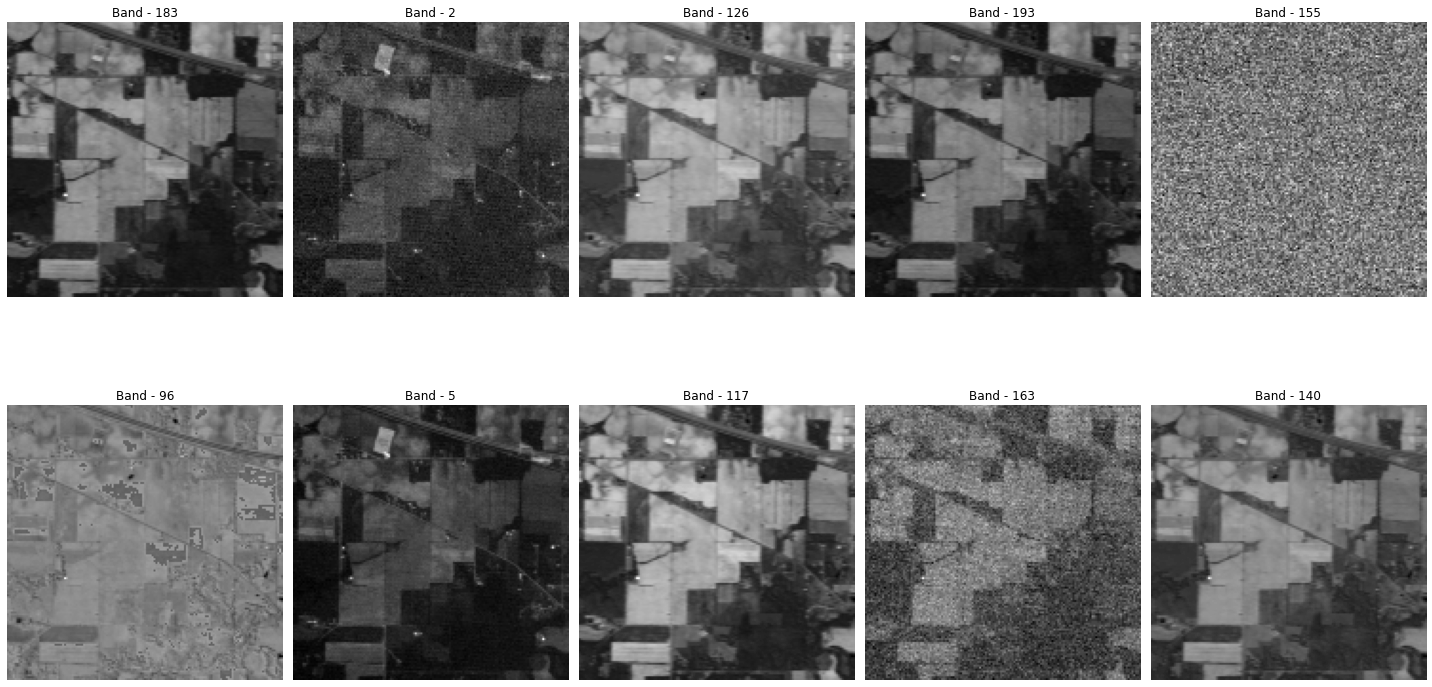

In [12]:
fig = plt.figure(figsize = (20, 12))
ax = fig.subplots(2, 5)

for i in range(2):
    for j in range(5):
        c = np.random.randint(224)
        ax[i][j].imshow(data[:, :, c], cmap='gray')
        ax[i][j].axis('off')
        ax[i][j].title.set_text(f"Band - {c}")
        c += 1

plt.tight_layout()

plt.show()

### RGB Composite Image of Indian Pines:
To plot/visualize the RGB Composite Image of _Indian Pines test site_, the bands 27, 30 and 60 are used.

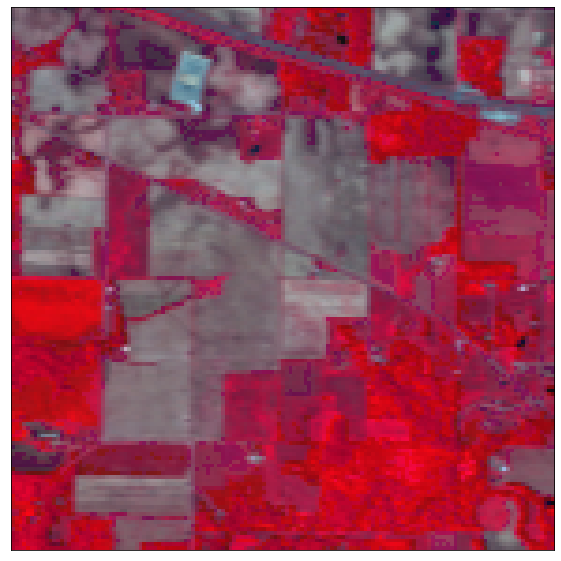

In [15]:
mdata = np.moveaxis(data, -1, 0)
# mdata.shape
# (220, 145, 145)

ep.plot_rgb(arr = mdata, rgb = (50, 27, 17), figsize=(12, 10))  # (60, 30, 27)

plt.show()

### Groundtruth:
The following image visualizes the ground truth of Indian Pines test site. __The ground truth available is designated into sixteen classes and is not all mutually exclusive__. This dataset has _16 classes_.


__NOTE:__ _Black color represents pixels with no information_ and will be discarded during the classification process.


In [ ]:
def plot_data(data):
    fig = plt.figure(figsize = (12, 10))
    plt.imshow(data, cmap = 'nipy_spectral')
    plt.colorbar()
    plt.axis('off')
    plt.show()
    
    return None


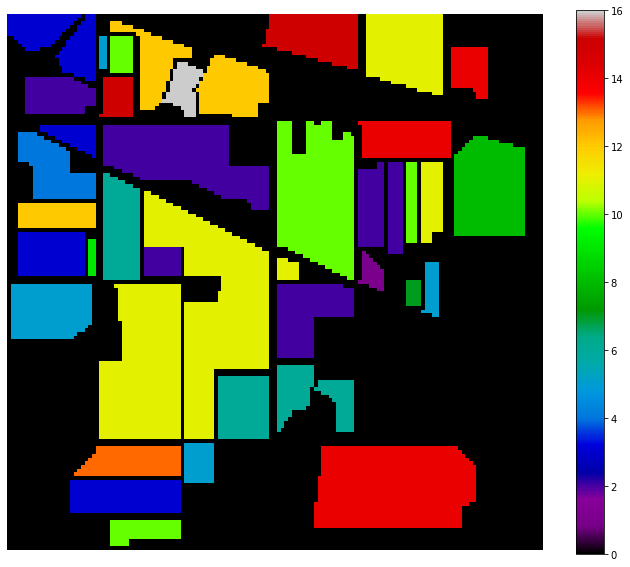

In [ ]:
plot_data(ground_truth)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data_df.csv to data_df.csv


In [9]:
import io
data_df = pd.read_csv(io.BytesIO(uploaded['data_df.csv']))

In [12]:
uploaded = files.upload()

Saving ground_truth.npy to ground_truth.npy


In [13]:
ground_truth = np.load(io.BytesIO(uploaded['ground_truth.npy']))

In [ ]:
# Write to CSV file for later analysis-
data_df.to_csv("data_df.csv", index = False)

In [10]:
# Read in CSV data-
data_df = pd.read_csv("data_df.csv")

In [11]:
data_df.shape

(21025, 221)

In [ ]:
# Save numpy file-
np.save('ground_truth.npy', ground_truth)

In [ ]:
# Load numpy file, sanity check-
gt = np.load('ground_truth.npy')
np.all(gt == ground_truth)

True

In [ ]:
ground_truth = np.load('ground_truth.npy')

In [14]:
ground_truth.shape

(145, 145)

## Using Deep Learning for Land Cover Classification:
__The spectral samples of the image containing no information is defined as Zero (0) and have to be discarded before the analysis.__

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [19]:
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.4.1


In [16]:
X = data_df[data_df['class'] != 0].iloc[:, :-1].values

In [17]:
y = tf.keras.utils.to_categorical(
    data_df[data_df['class'] != 0].iloc[:, -1].values,
    num_classes = np.unique(ground_truth).shape[0],
    dtype = 'float32'
)

In [18]:
print(f"X.shape = {X.shape} and y.shape = {y.shape}")

X.shape = (10249, 220) and y.shape = (10249, 17)


In [ ]:
# num_classes = np.unique(ground_truth).shape[0]

# num_classes
# 17

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.7, stratify = y)
print(f"X_train.shape = {X_train.shape} & X_test.shape = {X_test.shape}")

X_train.shape = (3074, 220) & X_test.shape = (7175, 220)


In [21]:
X_train[0].shape, y_train[1].shape

((220,), (17,))

**Define a Deep Learning model using TF2 Function API**

In [28]:
input_layer = Input(shape = X_train[0].shape)

x = BatchNormalization()(input_layer)
x = Dense(units = 128, activation = 'relu')(x)
x = Dense(units = 128, activation = 'relu')(x)
x = Dense(units = 128, activation = 'relu')(x)
x = Dense(units = 128, activation = 'relu')(x)

x = Dropout(rate = 0.2)(x)

x = Dense(units = 256, activation = 'relu')(x)
x = Dense(units = 256, activation = 'relu')(x)
x = Dense(units = 256, activation = 'relu')(x)
x = Dense(units = 256, activation = 'relu')(x)

x = Dropout(rate = 0.2)(x)

x = Dense(units = 32, activation = 'relu')(x)
x = Dense(units = 32, activation = 'relu')(x)
x = Dense(units = 32, activation = 'relu')(x)
x = Dense(units = 32, activation = 'relu')(x)

output = Dense(units = y_train.shape[1], activation = 'softmax')(x)

In [29]:
model = keras.Model(inputs = input_layer, outputs = output)

In [30]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 220)]             0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 220)               880       
_________________________________________________________________
dense_13 (Dense)             (None, 128)               28288     
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0   

In [31]:
# Compile the defined model-
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [32]:
# Define early stopping callback-
early_stopping_callback = EarlyStopping(
    monitor = 'val_loss', min_delta = 0.001,
    patience = 10, verbose = 1,
    restore_best_weights = True
)

In [33]:
# Train model-
history_indian_pines = model.fit(
    x = X_train, y = y_train,
    validation_data = (X_test, y_test), 
    epochs = 100, callbacks = early_stopping_callback)

Epoch 1/100
97/97 [==============================] - 2s 9ms/step - loss: 2.3241 - accuracy: 0.2641 - val_loss: 24.3773 - val_accuracy: 0.2396
Epoch 2/100
97/97 [==============================] - 1s 7ms/step - loss: 1.7321 - accuracy: 0.3554 - val_loss: 10.2655 - val_accuracy: 0.1398
Epoch 3/100
97/97 [==============================] - 1s 7ms/step - loss: 1.5852 - accuracy: 0.3928 - val_loss: 3.4514 - val_accuracy: 0.3334
Epoch 4/100
97/97 [==============================] - 1s 7ms/step - loss: 1.5415 - accuracy: 0.4339 - val_loss: 1.5591 - val_accuracy: 0.4038
Epoch 5/100
97/97 [==============================] - 1s 7ms/step - loss: 1.4987 - accuracy: 0.4655 - val_loss: 1.3442 - val_accuracy: 0.4898
Epoch 6/100
97/97 [==============================] - 1s 7ms/step - loss: 1.4046 - accuracy: 0.4839 - val_loss: 1.3142 - val_accuracy: 0.5082
Epoch 7/100
97/97 [==============================] - 1s 7ms/step - loss: 1.4011 - accuracy: 0.4791 - val_loss: 1.3022 - val_accuracy: 0.5437
Epoch 8/100

In [34]:
hist = pd.DataFrame(data = history_indian_pines.history)

fig = go.Figure()

fig.add_trace(
    go.Scatter(x = hist.index, y = hist.loss.values,
    mode='lines + markers', name = 'training loss'))

fig.add_trace(
    go.Scatter(x = hist.index, y = hist.accuracy.values,
    mode = 'lines + markers', name = 'training accuracy'))

fig.add_trace(
    go.Scatter(x = hist.index, y = hist.val_loss.values,
    mode = 'lines + markers', name = 'test loss'))

fig.add_trace(
    go.Scatter(x = hist.index, y = hist.val_accuracy.values,
    mode = 'lines + markers', name = 'test accuracy'))

fig.show()

In [35]:
# Make predictions using trained model-
pred = np.argmax(model.predict(X_test), axis=1)

In [36]:
uploaded = files.upload()

Saving Indian_Pines-Ground_Truth_Classes.csv to Indian_Pines-Ground_Truth_Classes.csv


In [38]:
ground_truth = pd.read_csv(io.BytesIO(uploaded['Indian_Pines-Ground_Truth_Classes.csv']))

In [42]:
# Classification Report
print(
    classification_report(pred, np.argmax(y_test, 1),
    target_names = ground_truth['Class'].to_list()))


                              precision    recall  f1-score   support

                     Alfalfa       0.56      0.35      0.43        51
                 Corn-notill       0.57      0.89      0.70       649
                Corn-mintill       0.55      0.75      0.64       429
                        Corn       0.63      0.70      0.66       148
               Grass-pasture       0.80      0.89      0.84       306
                 Grass-trees       0.99      0.90      0.94       563
         Grass-pasture-mowed       0.00      0.00      0.00         0
               Hay-windrowed       0.98      0.93      0.95       355
                        Oats       0.00      0.00      0.00         0
              Soybean-notill       0.81      0.63      0.70       876
             Soybean-mintill       0.77      0.72      0.74      1843
               Soybean-clean       0.78      0.54      0.64       601
                       Wheat       0.92      0.96      0.94       136
                   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



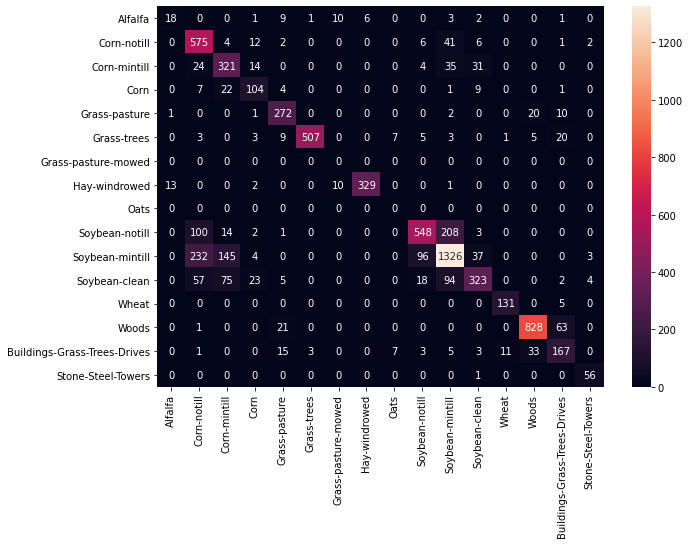

In [43]:
plt.figure(figsize = (10,7))

classes = ground_truth['Class'].to_list()

mat = confusion_matrix(np.add(pred, 1), np.add(np.argmax(y_test, 1), 1))
df_cm = pd.DataFrame(mat, index = classes, columns = classes)
sns.heatmap(df_cm, annot=True, fmt='d')

plt.show()